In [2]:
import numpy as np
import bayesflow as bf
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append("../../src/")
from helpers import CollapsingDDM, NeuralApproximator
from configurations import model_configs

2024-10-04 09:38:04.625748: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 09:38:04.625794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 09:38:04.628044: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-04 09:38:04.636965: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-04 09:38:07.287862: W tensorflow/comp

## Hyperbolic No Constraints

In [ ]:
model = CollapsingDDM(model_configs['hyperbolic_no_contraint'])
approximator = NeuralApproximator(model)

### Prior Push Forward Checks

In [5]:
%%time
example_sim = model.generate(batch_size=32)

CPU times: user 10.1 s, sys: 173 ms, total: 10.3 s
Wall time: 487 ms


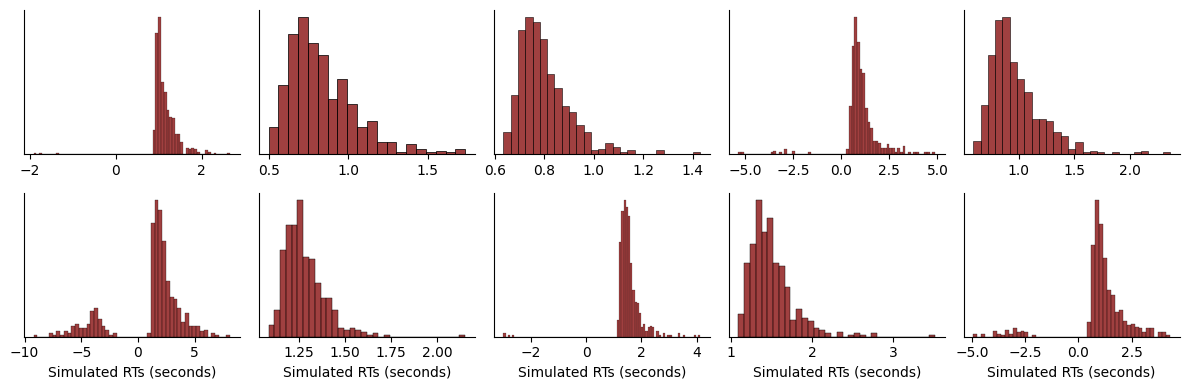

In [6]:
f, axarr = plt.subplots(2, 5, figsize=(12, 4))
for i, ax in enumerate(axarr.flat):
    sns.histplot(example_sim["sim_data"][i, : , 0], color="maroon", alpha=0.75, ax=ax)
    sns.despine(ax=ax)
    ax.set_ylabel("")
    ax.set_yticks([])
    if i > 4:
        ax.set_xlabel("Simulated RTs (seconds)")
f.tight_layout()

### Train Model

In [ ]:
history = approximator.run()

### Validation

In [15]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [16]:
val_data = model.configure(val_sim)

In [17]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [18]:
pred_params = post_samples * model.prior_stds + model.prior_means

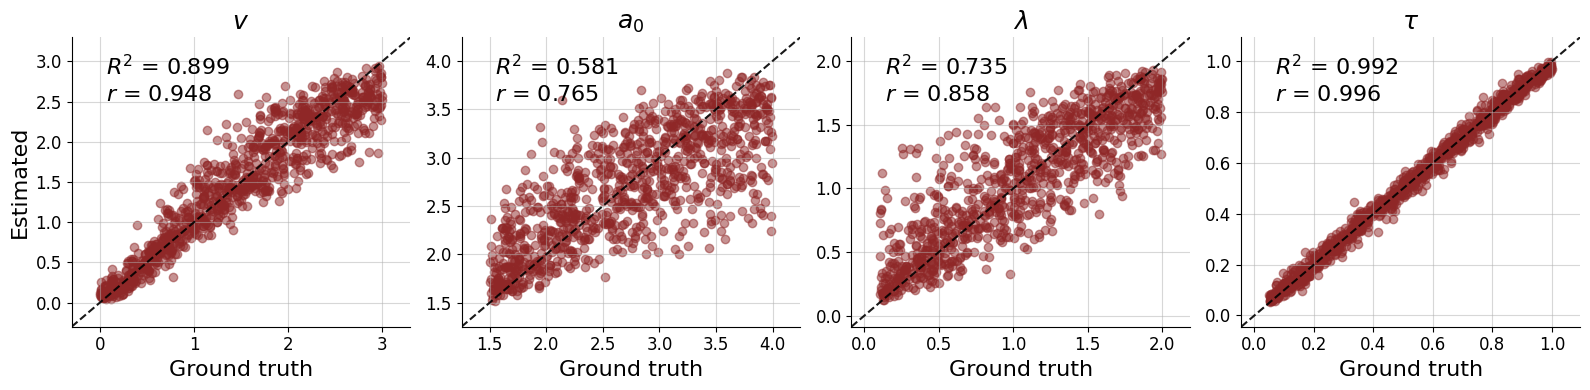

In [19]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

## Ndt Constraint

In [3]:
model = CollapsingDDM(model_configs['hyperbolic_ndt_contraint'])
approximator = NeuralApproximator(model)

INFO:root:Performing 2 pilot runs with the hyperbolic_ndt_contraint model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 5)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 500, 2)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [ ]:
history = approximator.run()

In [5]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [6]:
val_data = model.configure(val_sim)

In [7]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [8]:
pred_params = post_samples * model.prior_stds + model.prior_means

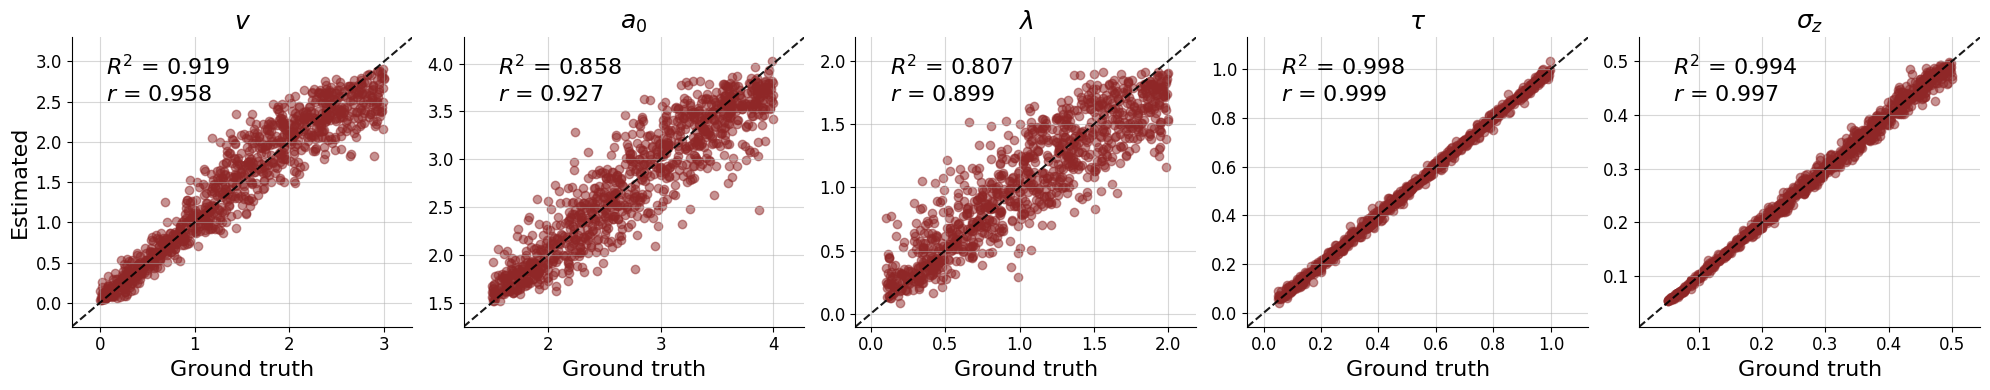

In [9]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

## Exponential no constraint

In [3]:
model = CollapsingDDM(model_configs['exponential_no_contraint'])
approximator = NeuralApproximator(model)

/datapool-1/homepoint/lschumacher2/miniconda3/envs/bf/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
INFO:root:Performing 2 pilot runs with the exponential_no_contraint model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 4)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 500, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.
2024-10-03 16:53:43.169848: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be a

### Prior Push Forward Check

In [4]:
%%time
example_sim = model.generate(batch_size=32)

CPU times: user 18.9 s, sys: 101 ms, total: 19 s
Wall time: 785 ms


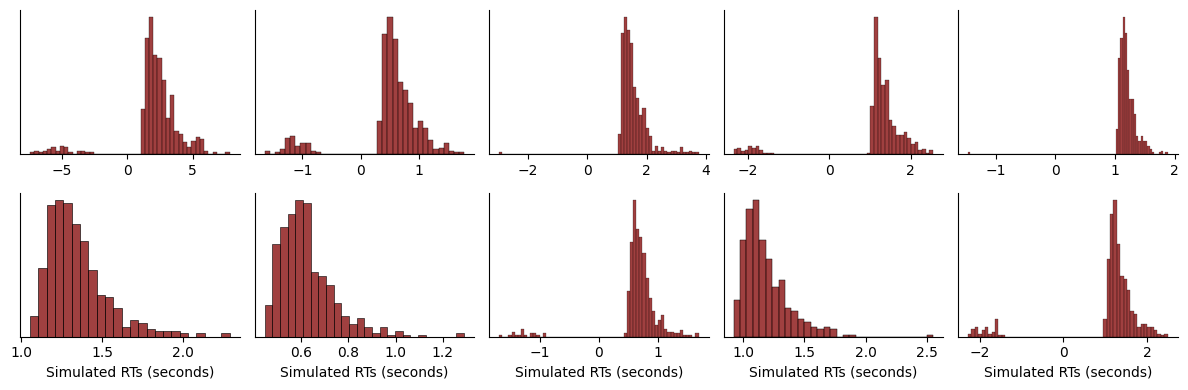

In [5]:
f, axarr = plt.subplots(2, 5, figsize=(12, 4))
for i, ax in enumerate(axarr.flat):
    sns.histplot(example_sim["sim_data"][i, : , 0], color="maroon", alpha=0.75, ax=ax)
    sns.despine(ax=ax)
    ax.set_ylabel("")
    ax.set_yticks([])
    if i > 4:
        ax.set_xlabel("Simulated RTs (seconds)")
f.tight_layout()

### Train Model

In [ ]:
history = approximator.run(75)

### Validation

In [7]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [8]:
val_data = model.configure(val_sim)

In [9]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [10]:
pred_params = post_samples * model.prior_stds + model.prior_means

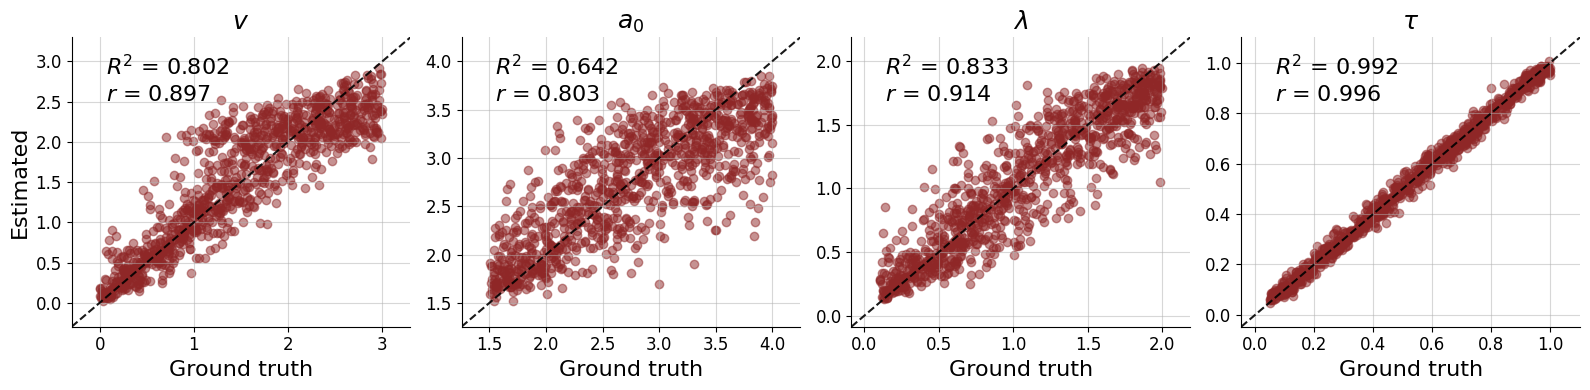

In [11]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

## Exponential no constraint

In [4]:
model = CollapsingDDM(model_configs['exponential_no_contraint'])
approximator = NeuralApproximator(model)

INFO:root:Performing 2 pilot runs with the exponential_no_contraint model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 4)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 500, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:Loaded loss history from ../../checkpoints/exponential_no_contraint/history_75.pkl.
INFO:root:Networks loaded from ../../checkpoints/exponential_no_contraint/ckpt-75
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


### Prior Push Forward Check

In [11]:
%%time
example_sim = model.generate(batch_size=32)

CPU times: user 16.3 s, sys: 31.8 ms, total: 16.3 s
Wall time: 694 ms


In [ ]:
f, axarr = plt.subplots(2, 5, figsize=(12, 4))
for i, ax in enumerate(axarr.flat):
    sns.histplot(example_sim["sim_data"][i, : , 0], color="maroon", alpha=0.75, ax=ax)
    sns.despine(ax=ax)
    ax.set_ylabel("")
    ax.set_yticks([])
    if i > 4:
        ax.set_xlabel("Simulated RTs (seconds)")
f.tight_layout()

### Train Model

In [ ]:
history = approximator.run(75)

In [ ]:
f = bf.diagnostics.plot_losses(history)

### Validation

In [15]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [16]:
val_data = model.configure(val_sim)

In [17]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [18]:
pred_params = post_samples * model.prior_stds + model.prior_means

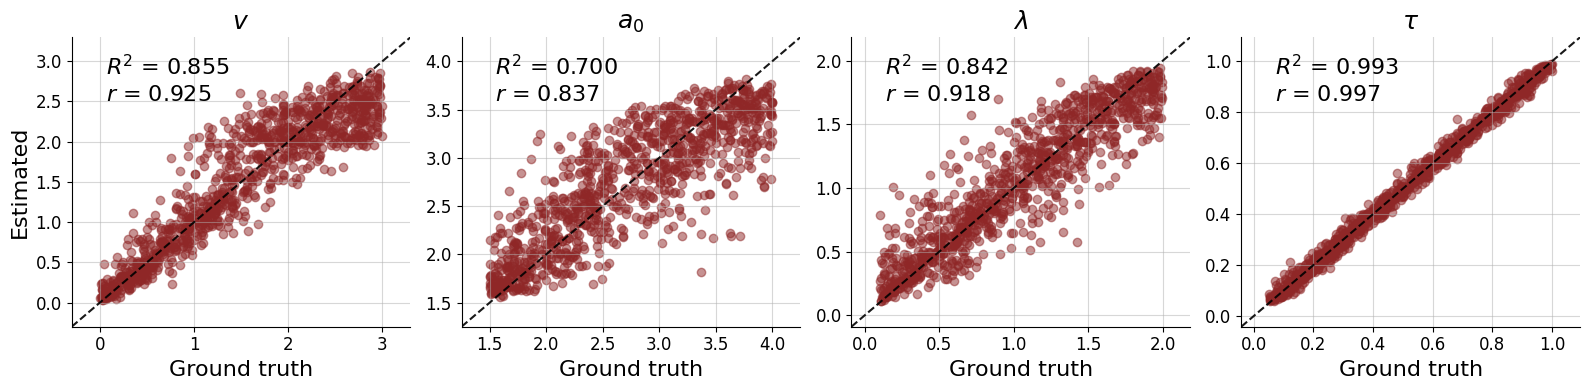

In [19]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

## Exponential ndt constraint

In [21]:
model = CollapsingDDM(model_configs['exponential_ndt_contraint'])
approximator = NeuralApproximator(model)

INFO:root:Performing 2 pilot runs with the exponential_ndt_contraint model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 5)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 500, 2)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [22]:
%%time
example_sim = model.generate(batch_size=32)

CPU times: user 29.5 s, sys: 24 ms, total: 29.6 s
Wall time: 1.15 s


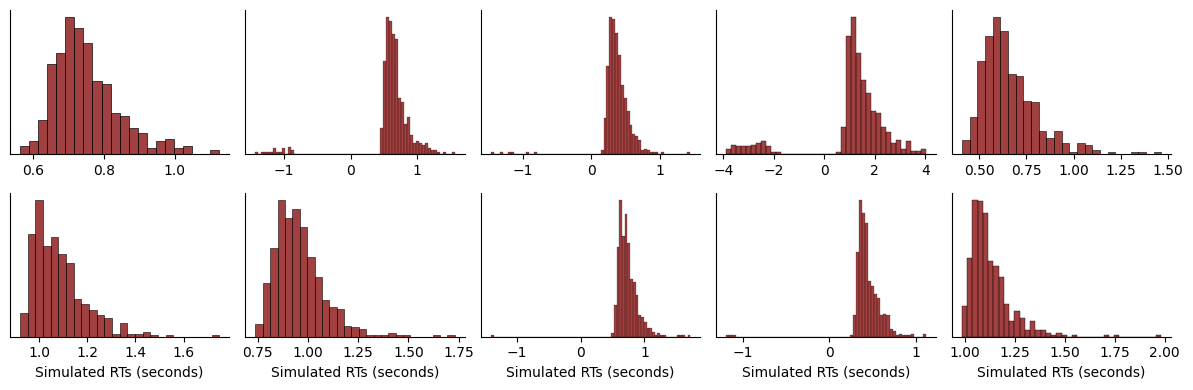

In [23]:
f, axarr = plt.subplots(2, 5, figsize=(12, 4))
for i, ax in enumerate(axarr.flat):
    sns.histplot(example_sim["sim_data"][i, : , 0], color="maroon", alpha=0.75, ax=ax)
    sns.despine(ax=ax)
    ax.set_ylabel("")
    ax.set_yticks([])
    if i > 4:
        ax.set_xlabel("Simulated RTs (seconds)")
f.tight_layout()

In [ ]:
history = approximator.run(100)

Training epoch 1:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 2:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 4:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 5:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 6:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 7:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 8:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 9:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 10:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 11:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 12:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 13:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 14:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 15:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 16:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 17:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
f = bf.diagnostics.plot_losses(history)

### Validation

In [ ]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [ ]:
val_data = model.configure(val_sim)

In [ ]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [ ]:
pred_params = post_samples * model.prior_stds + model.prior_means

In [ ]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)